# PCA (Principal Component Analysis)

## Procesamiento de imágenes

In [1]:
# Ejemplo de PCA para procesamiento de imágenes
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

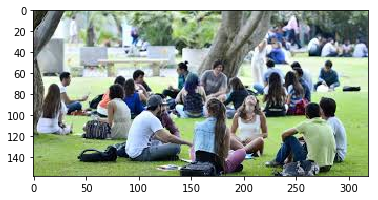

In [2]:
# Importar la imagen
# img=mpimg.imread("../Data/indice.png")
img=mpimg.imread("../Data/images.png")
plt.imshow(img)

La imagen tiene 4 componentes. El objetivo es reducir a una sóla componente.

### Reordenar la imagen en una sóla tabla

In [3]:
d=img.shape
img_col=np.reshape(img,(d[0]*d[1],d[2]))

## Iniciar el algoritmo de PCA

In [4]:
# Convertir los datos a media 0
medias=img_col.mean(axis=0)
img_m=img_col-medias

In [5]:
# Matriz de covarianzas
img_cov=np.cov(img_m.transpose())

# Valores propios (w) y vectores propios (v)
w,v=np.linalg.eig(img_cov)

# Porcentaje de varianza (valores propios)
porcentaje=w/np.sum(w)
porcentaje

array([0.93780452, 0.00802653, 0.05416894, 0.        ])

+ El valor propio en la posición $0$ es el que me otorga la mayor información.

In [6]:
# Reducir la dimensión de los datos
componentes=w[0:1]   # Valor propio
M_trans=v[:,0:1]     # Vector propio (matriz de transformación)

img_new=np.matrix(img_m)*np.matrix(M_trans)
img_new

matrix([[-0.14867747],
        [-0.31584895],
        [-0.50586233],
        ...,
        [ 0.03890111],
        [ 0.03890111],
        [ 0.03890111]])

In [7]:
# Recuperar la imagen 
img_recuperada=np.matrix(img_new)*np.matrix(M_trans.transpose())  # La traspuesta de una matriz simétrica es su inversa
img_recuperada=img_recuperada+medias
img_r=img.copy()
img_r[:,:,0]=img_recuperada[:,0].reshape((d[0],d[1]))
img_r[:,:,1]=img_recuperada[:,1].reshape((d[0],d[1]))
img_r[:,:,2]=img_recuperada[:,2].reshape((d[0],d[1]))
img_r[:,:,3]=img_recuperada[:,3].reshape((d[0],d[1]))
img_r[img_r<0]=0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


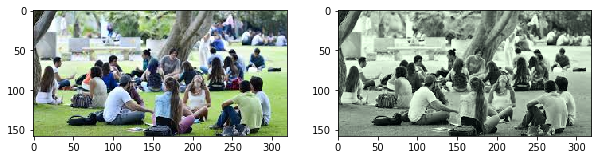

In [8]:
# Comparar las imágenes
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img_r)